In [3]:
!pip install openpyxl
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
file = '/content/Copy of Instagram_Analytics - DO NOT DELETE (for interview purposes).xlsx'
xls = pd.ExcelFile(file)

Task 1: Data cleaning

In [5]:
# Checking for duplicate values in each sheet
for sheet in xls.sheet_names:
  df = pd.read_excel(xls, sheet_name=sheet)
  duplicates = df[df.duplicated()]
  print(f"\nSheet: {sheet}")
  print(f"Number of duplicate rows: {len(duplicates)}")
  if not duplicates.empty:
     print("Duplicate rows:")
     print(duplicates)



Sheet: Instagram Profile Overview
Number of duplicate rows: 0

Sheet: Instagram Post Engagement
Number of duplicate rows: 0

Sheet: Instagram Age Gender Demographi
Number of duplicate rows: 0

Sheet: Instagram Top Cities Regions
Number of duplicate rows: 0

Sheet: SupermetricsQueries
Number of duplicate rows: 8
Duplicate rows:
   Supermetrics_Queries  column_1 column_2 column_3 column_4  column_5  \
5                   NaN       NaN      NaN      NaN      NaN       NaN   
7                   NaN       NaN      NaN      NaN      NaN       NaN   
9                   NaN       NaN      NaN      NaN      NaN       NaN   
10                  NaN       NaN      NaN      NaN      NaN       NaN   
12                  NaN       NaN      NaN      NaN      NaN       NaN   
13                  NaN       NaN      NaN      NaN      NaN       NaN   
15                  NaN       NaN      NaN      NaN      NaN       NaN   
16                  NaN       NaN      NaN      NaN      NaN       NaN   

   

Note: No duplicate values

In [6]:
# Function to clean and fix missing data
def clean_data(df, sheet_name):
    print(f"\n--- Sheet: {sheet_name} ---")

    # Show missing values
    print("Missing values in each column:")
    print(df.isnull().sum())

    # Special case: fill blanks in 'New followers' with 0
    if sheet_name == 'Instagram Profile Overview' and 'New followers' in df.columns:
        df['New followers'] = df['New followers'].fillna(0)

    # Fill other missing values using forward and backward fill
    df = df.ffill().bfill()

    # Convert date columns to datetime format
    for col in df.columns:
        if 'date' in col.lower():
            df[col] = pd.to_datetime(df[col], errors='coerce')

    # Convert to best data types
    df = df.convert_dtypes()

    return df


In [7]:
cleaned_data = {}

for sheet in xls.sheet_names:
    if sheet.strip().lower() == 'supermetrics_queries':
        continue

    df = pd.read_excel(xls, sheet_name=sheet)
    cleaned_df = clean_data(df, sheet)
    cleaned_data[sheet] = cleaned_df

    print(f"\nCleaned data from sheet: {sheet}")
    print(cleaned_df.head())



--- Sheet: Instagram Profile Overview ---
Missing values in each column:
Date                   0
Profile impressions    0
Shares                 0
Engagement             0
Profile visits         0
Profile reach          0
Reel shares            0
New followers          0
RowHash                0
dtype: int64

Cleaned data from sheet: Instagram Profile Overview
        Date  Profile impressions  Shares  Engagement  Profile visits  \
0 2025-03-02                   83       0           0               0   
1 2025-03-01                  109       0           0               0   
2 2025-02-28                  108       0           0               0   
3 2025-02-27                   82       0           0               0   
4 2025-02-26                   88       0           0               0   

   Profile reach  Reel shares  New followers  \
0             71            0              0   
1             82            0              0   
2             59            0              0   
3   

In [8]:
# Save cleaned data to a new Excel file
with pd.ExcelWriter('Cleaned_Instagram_Analytics.xlsx', engine='openpyxl') as writer:
  for sheet_name, cleaned_df in cleaned_data.items():
     cleaned_df.to_excel(writer, sheet_name=sheet_name, index=False)

print("Cleaned data has been saved to 'Cleaned_Instagram_Analytics.xlsx'.")


Cleaned data has been saved to 'Cleaned_Instagram_Analytics.xlsx'.


Note: The data looks clean. I just filled in 0 instead of NaN in the Instagram Profile Overview's New Followers column.

Task 2: Basic Analysis

In [9]:
# Load the Excel file
file_name = 'Cleaned_Instagram_Analytics.xlsx'
xls = pd.ExcelFile(file_name)


In [10]:
# Read the 'Instagram Post Engagement' sheet
df = pd.read_excel(xls, sheet_name='Instagram Post Engagement')

# Display the data
df


,Date,Media ID,Media caption,Media product type,Media impressions,Media reach,Like count,Comments count,Shares,Unique saves,Video views,RowHash
0,2025-01-19,17902204887015250,Comment ‘CLASS’ to sign up to my free mastercl...,FEED,868,814,10,8,1,2,0,673eb16a83d01ab25bd18d6511109e6f7205935760ece8...
1,2025-01-18,18071205646706820,Comment ‘CLASS’ to sign up to my free mastercl...,FEED,741,695,8,2,0,1,0,55102c6de8e1a68e015c44e3c8a600d06088fa042c29d0...
2,2025-01-17,18027615518313512,Comment ‘CLASS’ to sign up to my free mastercl...,FEED,1821,1666,24,14,0,13,0,68123274789468c3beb60c484c03735b62f4046cd452f3...
3,2025-01-16,18034591967437472,Comment ‘CLASS’ to sign up to my free mastercl...,REELS,0,1280,13,27,1,5,0,905354b956819e1cf3738a4541695cc1659b19fa2e7223...
4,2025-01-15,18012211340694190,Comment ‘CLASS’ to sign up to my free mastercl...,REELS,0,753,6,8,1,2,0,48a803f148ba92cef3d43ac7944ce9bb44ffe97486927a...
...,...,...,...,...,...,...,...,...,...,...,...,...
56,2024-08-09,18347817988138740,Tears ran down my face as I dropped my son off...,FEED,2040,1910,32,104,0,13,0,1e619a202f708d84dd4a2a150b89b4600d4893237268e3...
57,2024-08-08,18050919739826672,If you snap at your child because you're stres...,FEED,2989,2831,157,2,0,78,0,04bc7ef29acf5ea0e1f8e35d4cfa6130df531b5996cfac...
58,2024-08-06,18050838700839208,Reminder:\n\nNo matter what your marital statu...,FEED,1185,1180,49,0,0,4,0,67411b49f4479010fafce759e5342bf458a04200c50490...
59,2024-08-05,17905245740928500,Comment ‘GUIDE’ for my free guide on how to he...,REELS,0,3504,116,35,2,65,0,2f1aae84de4a164aabea086fe509c9d48e1e9829c59df4...


In [11]:
# Calculate total engagement (likes + comments + shares)
df['Total Engagement'] = df['Like count'] + df['Comments count'] + df['Shares']

# Calculate average engagement rate
average_engagement = df['Total Engagement'].mean()

# Print the result
print("Average Engagement Rate:", round(average_engagement, 2))


Average Engagement Rate: 120.43


In [12]:
# Find the post with the highest total engagement
top_post = df.loc[df['Total Engagement'].idxmax()]

# Print the top-performing post
print("Top-Performing Post Based on Engagement:")
print(top_post)


Top-Performing Post Based on Engagement:
Date                                                2024-11-16 00:00:00
Media ID                                              18077447254583660
Media caption         8 reminders you need to hear today as a divorc...
Media product type                                                 FEED
Media impressions                                                  9096
Media reach                                                        8063
Like count                                                          430
Comments count                                                       40
Shares                                                                0
Unique saves                                                        197
Video views                                                           0
RowHash               49d7c44fe51fcba432d743f096c8b1e73494959e48e49d...
Total Engagement                                                    470
Name: 28, dtype: object


Task 3: Visualization

In [13]:
# Create a new column for total engagement
df['Total Engagement'] = df['Like count'] + df['Comments count'] + df['Shares']

# Show the updated data
df[['Date', 'Like count', 'Comments count', 'Shares', 'Total Engagement']].head()


,Date,Like count,Comments count,Shares,Total Engagement
0,2025-01-19,10,8,1,19
1,2025-01-18,8,2,0,10
2,2025-01-17,24,14,0,38
3,2025-01-16,13,27,1,41
4,2025-01-15,6,8,1,15


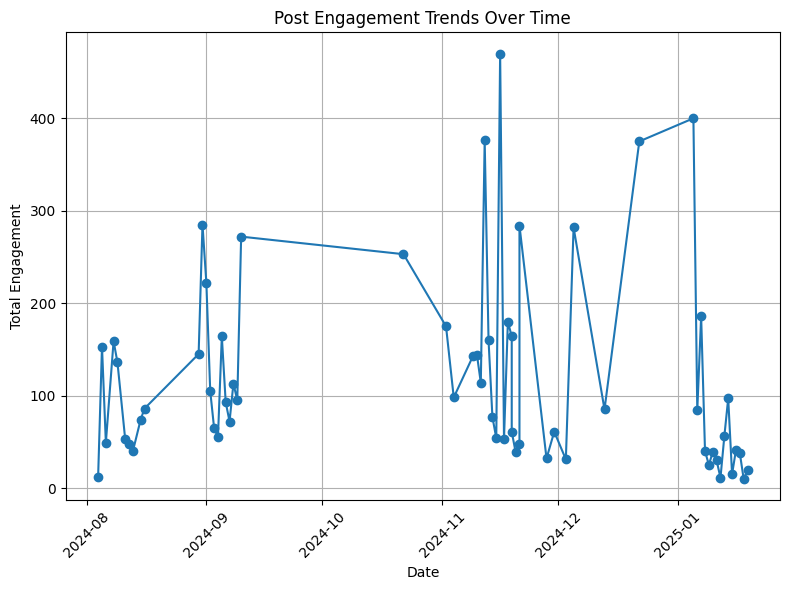

In [14]:
# Plot a line chart of engagement over time
plt.figure(figsize=(8, 6))
plt.plot(df['Date'], df['Total Engagement'], marker='o')
plt.title('Post Engagement Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Total Engagement')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


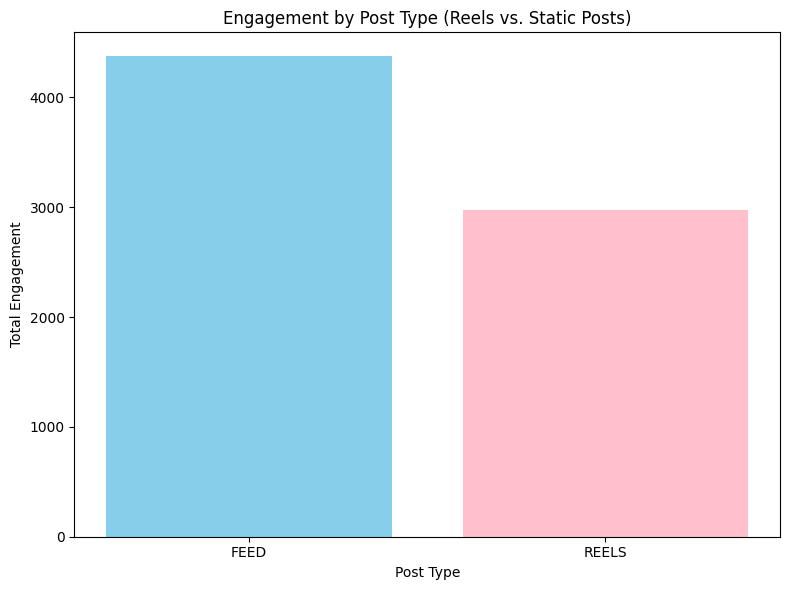

In [15]:
# Group by post type and sum total engagement
post_types = df.groupby('Media product type')['Total Engagement'].sum().reset_index()

# Plot a bar chart
plt.figure(figsize=(8, 6))
plt.bar(post_types['Media product type'], post_types['Total Engagement'], color=['skyblue', 'pink'])
plt.title('Engagement by Post Type (Reels vs. Static Posts)')
plt.xlabel('Post Type')
plt.ylabel('Total Engagement')
plt.tight_layout()
plt.show()


Task 4: Simple Threshold Model to Predict Post Performance

In [19]:
# Load the cleaned data file
file_name = 'Cleaned_Instagram_Analytics.xlsx'
xls = pd.ExcelFile(file_name)

# Load the relevant sheets
profile_df = pd.read_excel(xls, sheet_name='Instagram Profile Overview')
post_df = pd.read_excel(xls, sheet_name='Instagram Post Engagement')

# Fill missing values in New followers column (if any)
profile_df['New followers'] = profile_df['New followers'].fillna(0)

# Calculate approximate total followers by cumulative sum
profile_df['Estimated Followers'] = profile_df['New followers'].cumsum()

# Use latest available followers count
latest_followers = profile_df['Estimated Followers'].iloc[-1]

# Safety check: If latest followers is zero (highly unlikely but possible), set minimum of 1
latest_followers = max(latest_followers, 1)

print(f"\nEstimated Followers Count: {latest_followers}")

# Calculate Engagement Rate for each post
post_df['Engagement Rate'] = (post_df['Like count'] + post_df['Comments count']) / latest_followers

# Define threshold
threshold = 0.05  # 5%

# Apply prediction rule
post_df['Performance'] = post_df['Engagement Rate'].apply(lambda er: 'Perform Well' if er >= threshold else 'Perform Poorly')

# Show final prediction
print("\nPost Performance Predictions:")
print(post_df[['Date', 'Like count', 'Comments count', 'Engagement Rate', 'Performance']])

# Optional: Save result to Excel
post_df.to_excel('Predicted_Post_Performance.xlsx', index=False)
print("\nPredictions saved to 'Predicted_Post_Performance.xlsx'")



Estimated Followers Count: 194

Post Performance Predictions:
         Date  Like count  Comments count  Engagement Rate   Performance
0  2025-01-19          10               8         0.092784  Perform Well
1  2025-01-18           8               2         0.051546  Perform Well
2  2025-01-17          24              14         0.195876  Perform Well
3  2025-01-16          13              27         0.206186  Perform Well
4  2025-01-15           6               8         0.072165  Perform Well
..        ...         ...             ...              ...           ...
56 2024-08-09          32             104         0.701031  Perform Well
57 2024-08-08         157               2         0.819588  Perform Well
58 2024-08-06          49               0         0.252577  Perform Well
59 2024-08-05         116              35         0.778351  Perform Well
60 2024-08-04          12               0         0.061856  Perform Well

[61 rows x 5 columns]

Predictions saved to 'Predicted_Post_